In [1]:
import json
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from math import sqrt
from sklearn.mixture import GaussianMixture


#matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_json("yelp_academic_dataset_business.json", orient='column', lines=True)
print(df['latitude'].size)

188593


In [3]:

df.head(150)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montr茅al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


In [4]:
currentLocation = [35.93,-114.90]

list=[]
for i in range(0,df['latitude'].size):
     if (df['latitude'][i]-currentLocation[0]<0.08)and(df['latitude'][i]-currentLocation[0]>-0.08):
        if (df['longitude'][i]-currentLocation[1]<0.08)and(df['longitude'][i]-currentLocation[1]>-0.08):
             list.append(i)


In [5]:
print(list)

[1, 121, 537, 2091, 2380, 2466, 2790, 3107, 3437, 3439, 4596, 5142, 5308, 6258, 7171, 7677, 8268, 9485, 10303, 11178, 11740, 11794, 12066, 12272, 12492, 12810, 13247, 13249, 13423, 13650, 14223, 16615, 16966, 17783, 17784, 18560, 18686, 18941, 19179, 19401, 19594, 19904, 20666, 20759, 20762, 20763, 21471, 21590, 21608, 21609, 21820, 21835, 21965, 22029, 22157, 24215, 24532, 24731, 24837, 25431, 27079, 27800, 29616, 30641, 33379, 35033, 35412, 35548, 36643, 37334, 37335, 37336, 38874, 39694, 41029, 41915, 43172, 43312, 43906, 44532, 44549, 45712, 46413, 46464, 46568, 47867, 47868, 47886, 48892, 49700, 49998, 50684, 51177, 51178, 51445, 51891, 52281, 52391, 54154, 54326, 55318, 55708, 55914, 56936, 57153, 57880, 58886, 60466, 60988, 61166, 61628, 62102, 62103, 62168, 62169, 63923, 63926, 64545, 64766, 65443, 65736, 67138, 67866, 68563, 69175, 72033, 72112, 72676, 72743, 73021, 73692, 73864, 73962, 74505, 75010, 75231, 75232, 75541, 75679, 75755, 76609, 76896, 78051, 78345, 78372, 78550, 

In [6]:
#Check if the recommended restaurant is open
i=0
while i<len(list):

    if df['is_open'][list[i]]==0:
        list.pop(i)
    else:
        i+=1

In [7]:
list

[121,
 2091,
 2466,
 2790,
 3107,
 3437,
 4596,
 5308,
 6258,
 7171,
 7677,
 8268,
 9485,
 10303,
 11178,
 11740,
 11794,
 12066,
 12272,
 12492,
 12810,
 13247,
 13249,
 13650,
 14223,
 16615,
 16966,
 18560,
 18686,
 18941,
 19179,
 19401,
 19594,
 19904,
 20666,
 20759,
 20762,
 20763,
 21471,
 21590,
 21608,
 21609,
 21820,
 21835,
 21965,
 22029,
 22157,
 24215,
 24532,
 24731,
 24837,
 25431,
 27079,
 27800,
 29616,
 30641,
 33379,
 35033,
 35412,
 35548,
 36643,
 37334,
 37336,
 38874,
 39694,
 41029,
 41915,
 43312,
 43906,
 44532,
 45712,
 46413,
 46464,
 46568,
 47868,
 48892,
 49700,
 49998,
 51177,
 51178,
 51445,
 51891,
 52281,
 52391,
 54154,
 54326,
 55318,
 55708,
 55914,
 57153,
 57880,
 58886,
 60466,
 60988,
 61166,
 62102,
 62103,
 62169,
 63923,
 63926,
 64545,
 64766,
 65736,
 67138,
 67866,
 68563,
 69175,
 72033,
 72676,
 72743,
 73021,
 73692,
 73864,
 73962,
 74505,
 75010,
 75231,
 75232,
 75679,
 75755,
 76896,
 78051,
 78345,
 78372,
 78550,
 78719,
 79236

In [8]:
print(df['state'][107973])
print(df['state'][37335])
print(df['state'][537])


NV
NV
NV


In [9]:
food=[]
Type = []

for i in range(len(list)):
    boo=False
    cats=str(df['categories'][list[i]]).split(',')
    for j in range(len(cats)):
        if j>0:
            cats[j]=cats[j][1:]
    
    for count in (cats):
        if ((count == 'Restaurants')or(count == 'Food')):
            l=[]
            boo= True
            break
            
    if (not boo):
        continue
    else:
        if ('Nightlife'in cats or 'Bars'in cats or 'Wine Bars'in cats or 'Cocktail Bars'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Fast food'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Chinese'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Japanese'in cats or 'Sushi bars'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Thai'in cats or 'Vietnamese'in cats or 'Asian Fusion' in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Mexican'in cats or 'Latin American'in cats or 'Tacos' in cats):
            l.append(1)
        else:
            l.append(0)
        if ('French'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Italian'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('American (New)'in cats or 'American (Traditional)'in cats or 'Burgers' in cats or 'Pizza' in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Vegan'in cats or 'Vegetarian'in cats or 'Gluten-Free' in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Coffee & Tea'in cats or 'Cafes'in cats or 'Desserts' in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Mediterranean'in cats or 'Greek'in cats):
            l.append(1)
        else:
            l.append(0)
        if ('Indian'in cats or 'Halal'in cats):
            l.append(1)
        else:
            l.append(0)
    if (l==[0,0,0,0,0,0,0,0,0,0,0,0,0]):
        continue
    if df['review_count'][list[i]]<20:
        l.append((float(df['stars'][list[i]])-1+float(df['review_count'][list[i]])/20)/5)
    else:
        l.append((float(df['stars'][list[i]]))/5)
    Type.append(l)
    food.append(list[i])
    
Type.append([1,0,1,1,1,0,0,0,0,0,0,0,0,1])
print(Type)
print(food)
#Clear the noise by determining the word "restaurant" or "food" -> condition to remove and food.append

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.9], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.58], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.76], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.7], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.75], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.4], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.7], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.9], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.76], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.8], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0.4], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.8], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.7], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.9099999999999999], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.7], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.7], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.8400000000000001], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.85]

In [10]:
clusters = KMeans(n_clusters = 5)
clusters.fit(Type)
clusters.labels_

array([2, 1, 2, 4, 3, 2, 0, 2, 1, 2, 3, 0, 3, 4, 2, 2, 2, 3, 0, 3, 3, 2,
       4, 0, 4, 2, 3, 0, 2, 3, 4, 2, 0, 3, 4, 3, 2, 2, 2, 0, 1, 1])

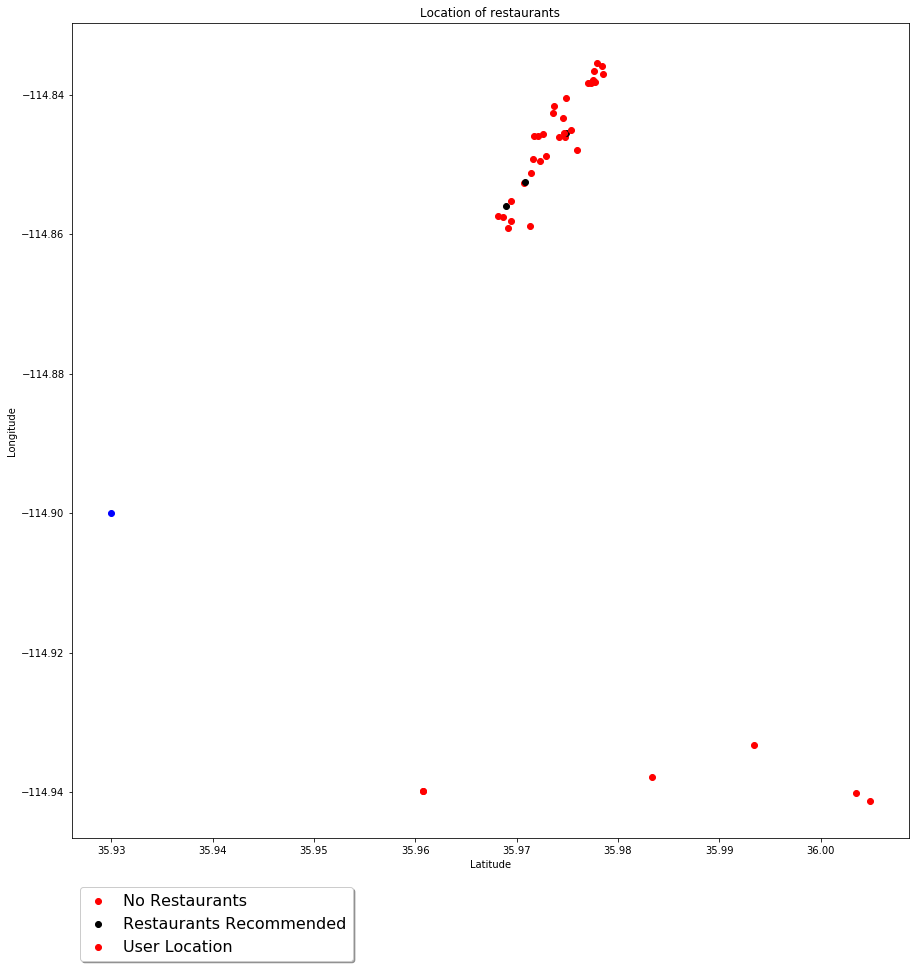

In [12]:
plt.figure(figsize=(15,15))
colors = ['black', 'red']
arr = clusters.labels_
num=[]
for i in range(len(food)):
    num.append(0)
    x = df['latitude'][food[i]]
    y = df['longitude'][food[i]] 
    if(arr[i] == arr[len(arr)-1]):
        plt.scatter(x,y,color = colors[0])
        num[i]+=1
    else:
        plt.scatter(x,y, color = colors[1])

plt.legend(('No Restaurants', 'Restaurants Recommended', 'User Location'),
    shadow=True, loc=(0.01, -0.15), handlelength=1.5, fontsize=16)
plt.scatter(currentLocation[0], currentLocation[1], color='blue')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Location of restaurants")
plt.show()



In [13]:
gmm = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm.fit(Type)
gmmarr=gmm.predict(Type)

In [14]:
for i in range(len(food)):
    if(gmmarr[i] == gmmarr[len(gmmarr)-1]):
        print(df['name'][food[i]])

Panda Express
China A GoGo
China Bistro


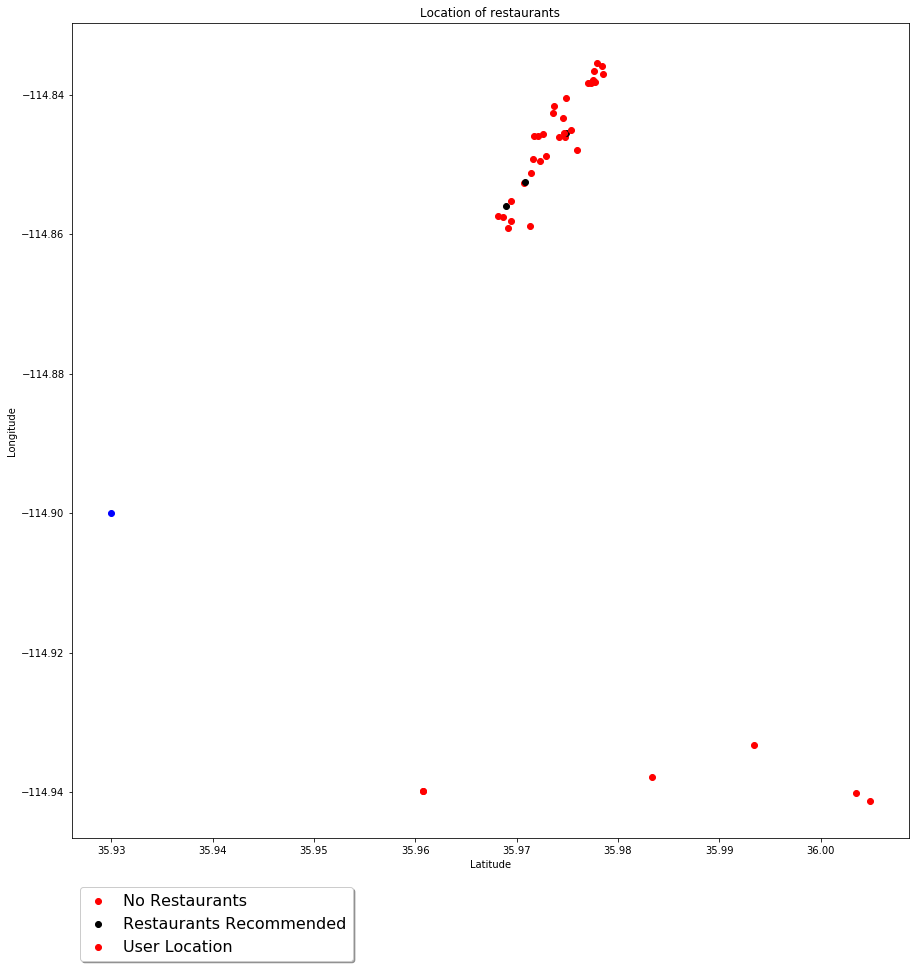

In [15]:
plt.figure(figsize=(15,15))
colors = ['black', 'red']
arr = clusters.labels_
for i in range(len(food)):
    x = df['latitude'][food[i]]
    y = df['longitude'][food[i]] 
    if(gmmarr[i] == gmmarr[len(arr)-1]):
        plt.scatter(x,y,color = colors[0])
        num[i]+=1
    else:
        plt.scatter(x,y, color = colors[1])

plt.legend(('No Restaurants', 'Restaurants Recommended', 'User Location'),
    shadow=True, loc=(0.01, -0.15), handlelength=1.5, fontsize=16)
plt.scatter(currentLocation[0], currentLocation[1], color='blue')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Location of restaurants")
plt.show()


In [22]:
for i in range(len(food)):
    if(arr[i] == arr[len(arr)-1]):
        print(df['name'][food[i]])

Panda Express
China A GoGo
China Bistro


In [23]:
first=[]
second=[]
for i in range(len(num)):
    if num[i]==2:
        first.append(food[i])
    elif num[i]==1:
        second.append(food[i])

In [27]:

for i in range(len(first)-1):
    for j in range(i+1,len(first)):
        if (pow(df['latitude'][first[i]]-currentLocation[0],2)+pow(df['longitude'][first[i]]-currentLocation[1],2))>(pow(df['latitude'][first[j]]-currentLocation[0],2)+pow(df['longitude'][first[j]]-currentLocation[1],2)):
            t=first[i]
            first[i]=first[j]
            first[j]=t
print(first)

for i in range(len(second)-1):
    for j in range(i+1,len(second)):
        if (pow(df['latitude'][second[i]]-currentLocation[0],2)+pow(df['longitude'][second[i]]-currentLocation[1],2))>(pow(df['latitude'][second[j]]-currentLocation[0],2)+pow(df['longitude'][second[j]]-currentLocation[1],2)):
            t=second[i]
            second[i]=second[j]
            second[j]=t
print(second)


[2466, 176077, 19594]
[]


In [45]:
for i in first:
    print(df.loc[i])
for i in second:
    print(df.loc[i])

address                                           1617 Nevada Hwy
attributes      {'Alcohol': 'none', 'Ambience': '{'romantic': ...
business_id                                JM9LVlM_o3k_CbCErIQYAg
categories                        Restaurants, Fast Food, Chinese
city                                                 Boulder City
hours           {'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...
is_open                                                         1
latitude                                                   35.969
longitude                                                -114.856
name                                                Panda Express
neighborhood                                                     
postal_code                                                 89005
review_count                                                   18
stars                                                           3
state                                                          NV
Name: 2466

In [37]:
#calculate the distance
def dist(startIndex, endIndex):
    disXSQ = 1000*1000*(df['latitude'][startIndex] - df['latitude'][endIndex])*(df['latitude'][startIndex] - df['latitude'][endIndex])
    disYSQ = 1000*1000*(df['longitude'][startIndex] - df['longitude'][endIndex])*(df['longitude'][startIndex] - df['longitude'][endIndex])
    return sqrt(disXSQ + disYSQ)

#Check if the input is mappable with the startIndex => endIndex is constant and should be equal 137220
def Mappable(startIndex, inputIndex, endIndex):
    start = df['latitude'][startIndex]*1000
    end = df['latitude'][endIndex]*1000
    inp = df['latitude'][inputIndex]*1000
    aver = (start + end)/2
    if (start <= end):
        if (inp > start and inp < aver and dist(start, inp) < dist(start, end)):
            return 'true'
        else:
            return 'false'
    else:
        if (inp < start and inp > aver and dist(start, inp) < dist(start, end)):
            return 'true'
        else:
            return 'false'

#Recommended: 137220
print(Mappable(1, 2466, 10303))

TypeError: cannot do label indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [35960.7337] of <class 'numpy.float64'>